In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df = pd.read_csv('dogs-postcode.csv')
df = df.dropna()
df['EstimatedDogPopulation'] = df['EstimatedDogPopulation'].str.replace(",","")
df['EstimatedDogPopulation'] = pd.to_numeric(df['EstimatedDogPopulation'])
df.head()

,PostcodeDistrict,EstimatedDogPopulation
0,AB10,1921.75
1,AB11,2377.35
2,AB12,4130.35
3,AB13,1323.24
4,AB14,2666.50


In [3]:
fp = 'Distribution/Districts.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,name,geometry
0,AB10,POLYGON ((-2.116454759005259 57.14656265903432...
1,AB11,(POLYGON ((-2.052573095588467 57.1342600856536...
2,AB12,(POLYGON ((-2.128066321470298 57.0368357386797...
3,AB13,POLYGON ((-2.261525922489881 57.10693578217748...
4,AB14,POLYGON ((-2.261525922489878 57.10693578217748...


In [4]:
#merged = map_df.set_index('name',drop=False).join(df.set_index('PostcodeDistrict',drop=False))
merged = map_df.merge(df, left_on = 'name', right_on = 'PostcodeDistrict', how = 'left')
merged = merged.set_index('name')
merged.head()


,geometry,PostcodeDistrict,EstimatedDogPopulation
name,,,
AB10,POLYGON ((-2.116454759005259 57.14656265903432...,AB10,1921.75
AB11,(POLYGON ((-2.052573095588467 57.1342600856536...,AB11,2377.35
AB12,(POLYGON ((-2.128066321470298 57.0368357386797...,AB12,4130.35
AB13,POLYGON ((-2.261525922489881 57.10693578217748...,AB13,1323.24
AB14,POLYGON ((-2.261525922489878 57.10693578217748...,AB14,2666.50


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


geometry                   object
PostcodeDistrict           object
EstimatedDogPopulation    float64
aggNames                   object
dtype: object


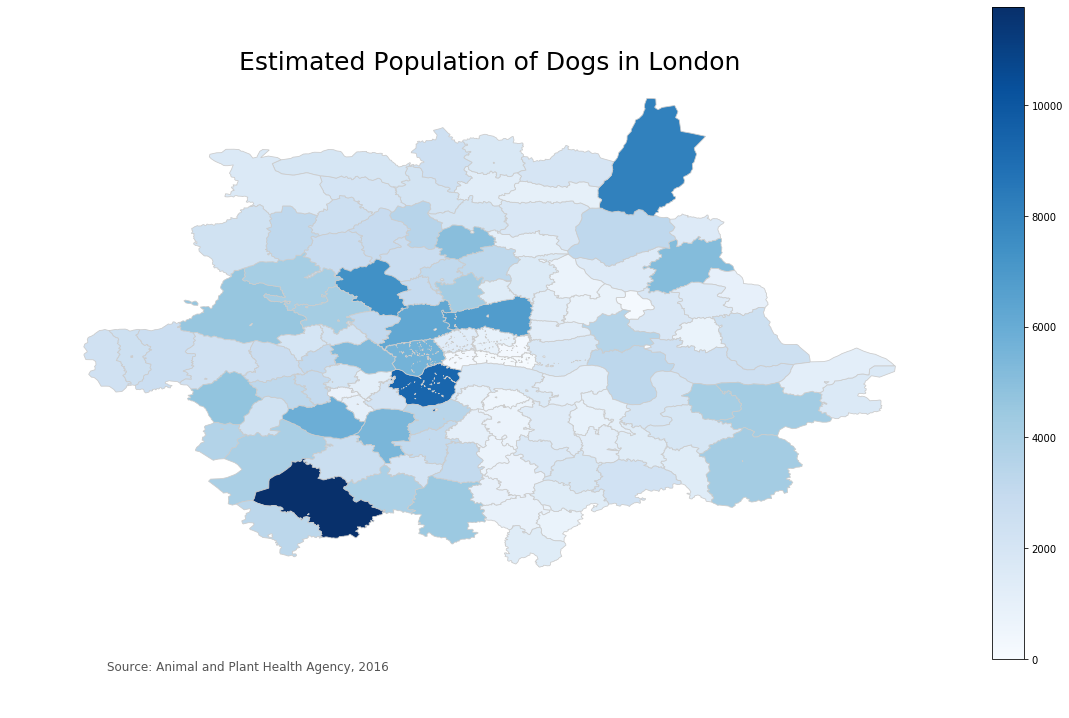

In [5]:
# set a variable that will call whatever column we want to visualise on the map
def limit_by_postcode(dataframe,postcodes):
    return dataframe.loc[dataframe['PostcodeDistrict'].astype(str).str[:2].str.strip('0123456789').isin(postcodes)]

def create_london(dataframe):
    london = limit_by_postcode(dataframe,['N','NW','SW','SE','W','WC','E','EC'])
    london["aggNames"] = london['PostcodeDistrict']
    mask = london['PostcodeDistrict'].str.strip('0123456789').str.len() > 2
    london.loc[mask,'aggNames'] = london['PostcodeDistrict'].str.rstrip('QWERTYUIOPASDFGHJKLZXCVBNM')
    print(london.dtypes)
    better_london = london.dissolve(by='aggNames', aggfunc='sum')
    better_london['PostcodeDistrict'] = better_london.index
    return better_london


london = create_london(merged)
def plot_map(variable,data):
    # set the range for the choropleth
    vmin, vmax = data[variable].min(),data[variable].max()
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 12))
    data.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    ax.axis('off')

    # add a title
    ax.set_title('Estimated Population of Dogs in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # create an annotation for the data source
    ax.annotate('Source: Animal and Plant Health Agency, 2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    return ax
plot_map('EstimatedDogPopulation',london)

In [6]:
population = pd.read_csv('uk population  districts.csv')
population = population.rename(columns={"Variable: All usual residents; measures: Value":"population","Variable: Area (Hectares); measures: Value": "area (hectors)"})
population=population[['geography','population','area (hectors)']]
population.head()

,geography,population,area (hectors)
0,AL1,36180,1055.02
1,AL10,35900,2023.54
2,AL2,23604,3734.88
3,AL3,28462,6803.77
4,AL4,27268,5299.97


In [7]:
merged_2 = merged.merge(population, left_on = 'PostcodeDistrict', right_on = 'geography', how = 'left')
merged_2.head()

,geometry,PostcodeDistrict,EstimatedDogPopulation,geography,population,area (hectors)
0,POLYGON ((-2.116454759005259 57.14656265903432...,AB10,1921.75,NaN,NaN,NaN
1,(POLYGON ((-2.052573095588467 57.1342600856536...,AB11,2377.35,NaN,NaN,NaN
2,(POLYGON ((-2.128066321470298 57.0368357386797...,AB12,4130.35,NaN,NaN,NaN
3,POLYGON ((-2.261525922489881 57.10693578217748...,AB13,1323.24,NaN,NaN,NaN
4,POLYGON ((-2.261525922489878 57.10693578217748...,AB14,2666.50,NaN,NaN,NaN


In [8]:

def create_stats(dataframe):
    dataframe['dog_to_human_density'] = dataframe['EstimatedDogPopulation']/dataframe['population']
    dataframe['dog_per_hector'] = dataframe['EstimatedDogPopulation']/dataframe['area (hectors)']
    dataframe.loc[dataframe['population'] < 1,['dog_to_human_density','dog_per_hector']] = np.nan
    dataframe = dataframe.round(2)
    dataframe['EstimatedDogPopulation'] = dataframe['EstimatedDogPopulation'].round(0)
    dataframe['name']=dataframe.index
    return dataframe
better_london = create_london(merged_2)
print(better_london.dtypes)
better_london = create_stats(better_london)
better_london.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


geometry                   object
PostcodeDistrict           object
EstimatedDogPopulation    float64
geography                  object
population                float64
area (hectors)            float64
aggNames                   object
dtype: object
geometry                   object
EstimatedDogPopulation    float64
population                float64
area (hectors)            float64
PostcodeDistrict           object
dtype: object


,geometry,EstimatedDogPopulation,population,area (hectors),PostcodeDistrict,dog_to_human_density,dog_per_hector,name
aggNames,,,,,,,,
E1,POLYGON ((-0.041418131465519 51.51220620598703...,1864.0,82817.0,657.35,E1,0.02,2.84,E1
E10,POLYGON ((-0.02502186567645961 51.570173597532...,1559.0,43120.0,571.08,E10,0.04,2.73,E10
E11,POLYGON ((0.02620909167990144 51.5865800527532...,5192.0,54689.0,833.52,E11,0.09,6.23,E11
E12,POLYGON ((0.06380662908943611 51.5572878787148...,974.0,42606.0,567.98,E12,0.02,1.71,E12
E13,POLYGON ((0.01239701705902473 51.5198311941758...,780.0,47169.0,343.62,E13,0.02,2.27,E13


In [9]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.io import curdoc
from bokeh.models import Slider, HoverTool, PanTool,WheelZoomTool,ZoomInTool,ZoomOutTool
from bokeh.layouts import widgetbox, row, column

def bokeh_plot(data,variable,title):
    #Read data to json.
    merged_json = json.loads(data.to_json())
    #Convert to String like object.
    json_data = json.dumps(merged_json)
    #Input GeoJSON source that contains features for plotting.
    geosource = GeoJSONDataSource(geojson = json_data)
    #Define a sequential multi-hue color palette.
    palette = brewer['YlGnBu'][8]
    #Reverse color order so that dark blue is highest obesity.
    palette = palette[::-1]
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = data[variable].min(), high = data[variable].max())
    #Add hover tool
    hover = HoverTool(tooltips = [ ('Postcode District','@PostcodeDistrict'),(title, '@'+variable),('Dog Popultion','@EstimatedDogPopulation')])
    pan = PanTool()
    zoom = WheelZoomTool()
    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
    border_line_color=None,location = (0,0), orientation = 'horizontal')

    #Create figure object.
    p = figure(title = title, plot_height = 600 , plot_width = 950,tools = [hover,pan,zoom])
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource,fill_color = {'field' :variable, 'transform' : color_mapper},
              line_color = 'black', line_width = 0.25, fill_alpha = 1)
    #Specify figure layout.
    p.add_layout(color_bar, 'below')
    #Display figure inline in Jupyter Notebook.
    output_file("{}.html".format(title))
    output_notebook()
    #Display figure.
    show(p)

In [10]:
bokeh_plot(better_london,'dog_to_human_density','Dog to Human Ratio')

Loading BokehJS ...

In [11]:
bokeh_plot(better_london,'dog_per_hector','Dogs per Hector on london')

Loading BokehJS ...

In [12]:

bokeh_plot(create_stats(limit_by_postcode(merged_2,['CV'])),'dog_per_hector','Dogs per hector in warwickshire')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Loading BokehJS ...